Forma dell'array dopo preprocessing: (224, 224)
Valori min/max: 0.0 0.9372549019607843


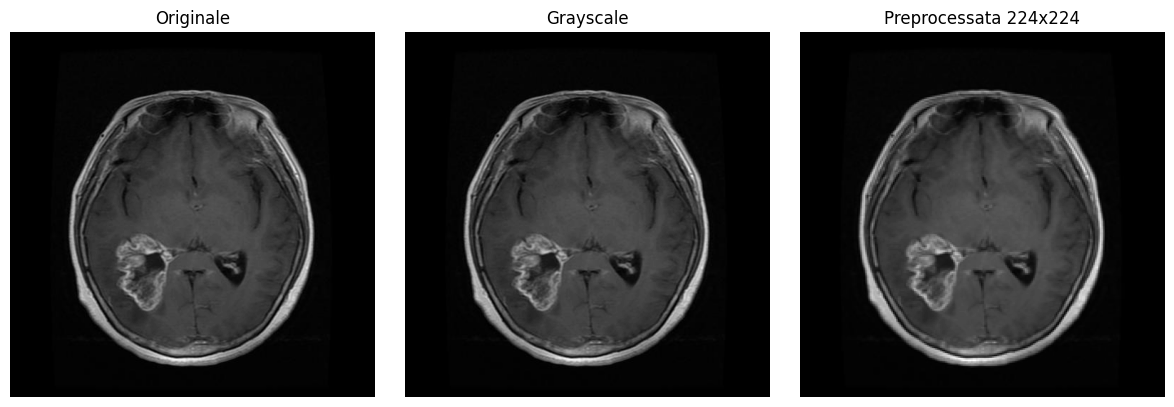

In [1]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Percorso base: stesso del notebook 01
base_dir = "../data/brain_tumor_mri"
train_dir = os.path.join(base_dir, "Training")

# Le classi del dataset
classes = ["glioma", "meningioma", "notumor", "pituitary"]

# Dimensione a cui vogliamo portare tutte le immagini
IMAGE_SIZE = (224, 224)

def load_example_image():
    """
    Prende una immagine di esempio dal training set (classe glioma)
    solo per mostrare il confronto prima/dopo.
    """
    cls = "glioma"
    folder = os.path.join(train_dir, cls)
    first_img_name = os.listdir(folder)[0]
    img_path = os.path.join(folder, first_img_name)
    img = Image.open(img_path)
    return img

def preprocess_image(img):
    """
    COSA FA:
    1. Converte in bianco e nero (grayscale)
    2. Ridimensiona a 224x224
    3. Converte in array numpy con valori tra 0 e 1
    """
    img_gray = img.convert("L")                 # grayscale
    img_resized = img_gray.resize(IMAGE_SIZE)   # resize
    arr = np.array(img_resized) / 255.0         # normalizzazione 0-1
    return img_gray, img_resized, arr

# 1. Carico un'immagine originale
orig_img = load_example_image()

# 2. Applico il preprocessing
gray_img, resized_img, arr = preprocess_image(orig_img)

print("Forma dell'array dopo preprocessing:", arr.shape)
print("Valori min/max:", arr.min(), arr.max())

# 3. Visualizzo: originale vs grayscale vs preprocessata
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.title("Originale")
plt.imshow(orig_img, cmap="gray")
plt.axis("off")

plt.subplot(1,3,2)
plt.title("Grayscale")
plt.imshow(gray_img, cmap="gray")
plt.axis("off")

plt.subplot(1,3,3)
plt.title("Preprocessata 224x224")
plt.imshow(resized_img, cmap="gray")
plt.axis("off")

plt.tight_layout()
plt.show()